Assignment No.09-01

Prepare rules for the data set.

1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values

2) Change the minimum length in apriori algorithm

3) Visulize the obtained rules using different plots 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot  as plt

In [6]:
df_bk=pd.read_csv("/content/drive/MyDrive/Datasets/Association Rules/book.csv")

In [7]:
df_bk.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [10]:
df_bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


#### No null values

### Apriori Algorithm

In [8]:
frequent_itemsets=apriori(df_bk,min_support=0.1,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [13]:
frequent_itemsets.sort_values('support',ascending=False,inplace=True)
frequent_itemsets.sort_values

<bound method DataFrame.sort_values of     support                       itemsets
2    0.4310                      (CookBks)
0    0.4230                     (ChildBks)
3    0.2820                     (DoItYBks)
6    0.2760                      (GeogBks)
10   0.2560            (ChildBks, CookBks)
1    0.2475                     (YouthBks)
5    0.2410                       (ArtBks)
4    0.2145                       (RefBks)
14   0.1950            (ChildBks, GeogBks)
22   0.1925             (CookBks, GeogBks)
19   0.1875            (CookBks, DoItYBks)
11   0.1840           (ChildBks, DoItYBks)
21   0.1670              (CookBks, ArtBks)
9    0.1650           (YouthBks, ChildBks)
13   0.1625             (ChildBks, ArtBks)
15   0.1620            (YouthBks, CookBks)
20   0.1525              (CookBks, RefBks)
12   0.1515             (ChildBks, RefBks)
33   0.1495   (ChildBks, GeogBks, CookBks)
30   0.1460  (ChildBks, CookBks, DoItYBks)
26   0.1325            (GeogBks, DoItYBks)
29   0.1290  (Y

### Confidence (0.5)

In [14]:
confidence_rules= association_rules(frequent_itemsets,metric='confidence',min_threshold=0.5)
confidence_rules
confidence_rules.sort_values('confidence',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
48,"(ArtBks, DoItYBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159
36,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354
42,"(ArtBks, GeogBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812
29,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
30,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
45,"(ArtBks, GeogBks)",(ChildBks),0.1275,0.423,0.1020,0.800000,1.891253,0.048067,2.885000
21,"(YouthBks, CookBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545
17,"(ChildBks, DoItYBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158
39,"(GeogBks, DoItYBks)",(ChildBks),0.1325,0.423,0.1045,0.788679,1.864490,0.048452,2.730446


In [15]:
C=confidence_rules[confidence_rules.confidence>=0.8]
C

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
30,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
32,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
36,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354
42,"(ArtBks, GeogBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812
48,"(ArtBks, DoItYBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159


#### Finding association rules with threshold of 0.8
#### Sorting the association rules with heighest lift ratio for top 10

In [16]:
lift_rules = association_rules(frequent_itemsets,metric="lift",min_threshold=0.8)
lift_rules
lift_rules.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
63,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
62,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
86,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
91,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
96,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
93,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
85,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
80,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
81,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
84,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


In [17]:
L=lift_rules[lift_rules.lift>1]
L

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
3,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
4,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361
...,...,...,...,...,...,...,...,...,...
95,(CookBks),"(ArtBks, DoItYBks)",0.4310,0.1235,0.1015,0.235499,1.906873,0.048272,1.146499
96,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
97,(DoItYBks),"(CookBks, ArtBks)",0.2820,0.1670,0.1015,0.359929,2.155264,0.054406,1.301418
98,(YouthBks),(ArtBks),0.2475,0.2410,0.1010,0.408081,1.693281,0.041353,1.282270


In [18]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


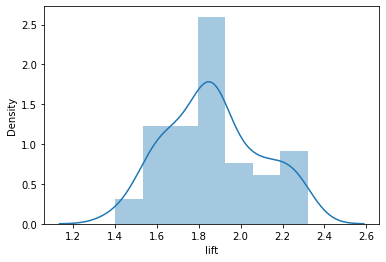

In [19]:
sns.distplot(L["lift"])

Text(0.5, 1.0, 'confidence vs lift')

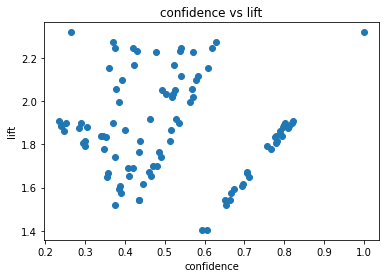

In [20]:
con=lift_rules['confidence']
lif=lift_rules['lift']
plt.scatter(con,lif)
plt.xlabel('confidence')
plt.ylabel('lift')
plt.title('confidence vs lift')

Text(0.5, 1.0, ' lift vs confidence ')

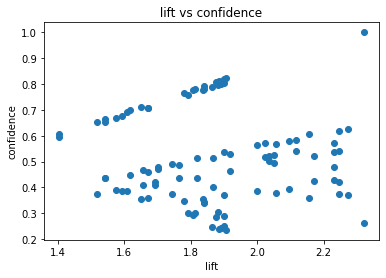

In [21]:
con=lift_rules['confidence']
lif=lift_rules['lift']
plt.scatter(lif,con)
plt.xlabel('lift')
plt.ylabel('confidence')
plt.title(' lift vs confidence ')

### Apriori Algorithm for determing support of itemsets (with min_support=0.17)

In [22]:
frequent_itemsets_1=apriori(df_bk,min_support=0.17,use_colnames=True)
frequent_itemsets_1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(ChildBks, CookBks)"
8,0.1840,"(ChildBks, DoItYBks)"
9,0.1950,"(ChildBks, GeogBks)"


In [23]:
rules=association_rules( frequent_itemsets_1, metric='lift', min_threshold=0.9)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(DoItYBks),0.423,0.282,0.1840,0.434988,1.542511,0.064714,1.270770
3,(DoItYBks),(ChildBks),0.282,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
4,(ChildBks),(GeogBks),0.423,0.276,0.1950,0.460993,1.670264,0.078252,1.343211
5,(GeogBks),(ChildBks),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
6,(CookBks),(DoItYBks),0.431,0.282,0.1875,0.435035,1.542677,0.065958,1.270875
7,(DoItYBks),(CookBks),0.282,0.431,0.1875,0.664894,1.542677,0.065958,1.697968
8,(CookBks),(GeogBks),0.431,0.276,0.1925,0.446636,1.618245,0.073544,1.308361
9,(GeogBks),(CookBks),0.276,0.431,0.1925,0.697464,1.618245,0.073544,1.880766


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


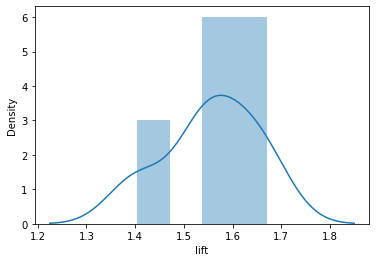

In [24]:
sns.distplot(rules.lift)

Text(0.5, 1.0, 'confidence vs lift')

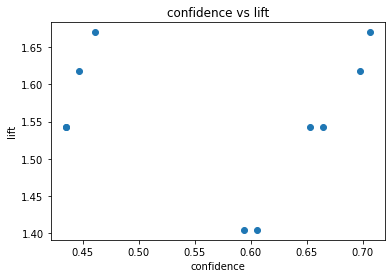

In [25]:
con=rules['confidence']
lif=rules['lift']
plt.scatter(con,lif)
plt.xlabel('confidence')
plt.ylabel('lift')
plt.title('confidence vs lift')